### 18.4 Laden eines Kondensators

<img src="figures/18.4_1.png" alt="18.4_1" style="width: 300px;"/>

Wir fragen nach der Spannung und den Strom am Kondensator wenn der Schalter zum Zeitpunkt $t=0$ umgelegt wird:

\begin{eqnarray}
U_C(t)&=&?\\
I(t)&=&?
\end{eqnarray}

Maschenregel:
$$U_{01}=I\, R_1 +U_C\tag{18.4.0}$$

wobei die Spannung am Kondensator durch die Ladung $Q$ gegeben ist:

$$U_C=\frac{Q}{C}$$
und somit

$$U_{01}=I\, R_1 + \frac{Q}{C}\tag{18.4.1}$$

Wir müssen also die Ladung die auf den Kondensator aufgebracht wird bestimmen. Dazu differenzieren wir Gleichung (18.4.1) nach der Zeit.

$$\frac{\mathrm{d}}{\mathrm{d}t}\left(U_{01}\right)=
\frac{\mathrm{d}}{\mathrm{d}t}\left(I\, R_1\right)+
\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{Q}{C}\right)$$

$U_{01}$, $R_1$ und $C$ sind zeitlich konstant, darum

$$0=R_1\, \frac{\mathrm{d}I}{\mathrm{d}t} + \frac{1}{C}\frac{\mathrm{d}Q}{\mathrm{d}t}\tag{18.4.2}$$

Nach Definition ist $\mathrm{d}Q/\mathrm{d}t=I$, und daher ergibt sich aus Gl. (18.4.2)

$$I=-R_1 C\, \frac{\mathrm{d}I}{\mathrm{d}t}\tag{18.4.3}\quad.$$

Die Differentialgleichung (18.4.3) kann durch Trennung der Variablen gelöst werden. Vorher benennen wir das Produkt $\tau=R_1 C$. $\tau$ wird Zeitkonstante genannt.

\begin{eqnarray}
\frac{\mathrm{d}{I}}{I} = -\frac{1}{\tau}\mathrm{d}t\\
\int_{I(t=0)}^{I(t)}\frac{\mathrm{d}{I'}}{I'} = \int_0^t -\frac{1}{\tau}\mathrm{d}t'\\
\ln\left(\frac{I(t)}{I(t=0)}\right) = - \frac{t}{\tau} \tag{18.4.4}
\end{eqnarray}

Auflösen nach $I(t)$:

$$I(t) = I(t=0)\, \exp\left(-\frac{t}{\tau}\right)\tag{18.4.5}$$

Anfangsbedingungen: $t=0 \quad \rightarrow \quad U_C=0$

Eingesetzt in Gl. (18.4.0) gibt

$$I(t=0)=\frac{U_{01}}{R_1}$$

und damit wird Gl. (18.4.5)

$$I(t) =  \frac{U_{01}}{R_1}\, \exp\left(-\frac{t}{\tau}\right)$$

Für $t\rightarrow\infty$ verschwindet $I(t\rightarrow\infty)=0$.

Wegen Gl. (18.4.1) ist $U_C=U_{01}-I(t) \, R_1$

$$U_C(t)=U_{01}\,\left[1-\exp\left(-\frac{t}{\tau}\right)\right]$$

Und die Spannung am Kondensator nähert sich für $t\rightarrow\infty$ an die Batteriespannung $U_{01}$ an, $U_C(t\rightarrow\infty)=U_{01}$.

----
Man kann Differentialgleichungen auch direkt mit dem Rechner lösen. Hier machen wir das am Beispiel der Gleichung (18.4.3) 

$$
\frac{\mathrm{d}I(t)}{\mathrm{d}t}=-\frac{1}{R_1 C}I(t)
$$

Im untenstehenden Programm wird die Gleichung in der Funktion definiert
```python
def Icharge(y,t):```

und mit dem Befehl
```python
I = odeint(Icharge,I0,t)```
integriert.


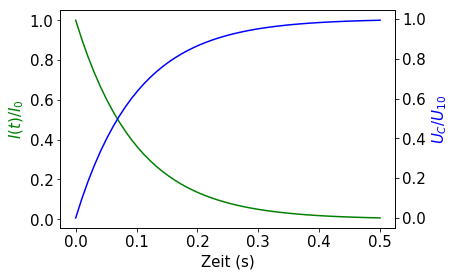

In [1]:
%matplotlib inline
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

global kind, Ubatt, R1, C

def Icharge(y,t):
    global kind, Ubatt, R1, C
    I = y
    dIdt = -I/(R1*C) #see Eq. (18.4.3)
    return dIdt

R1 = 1e5    #Ohm
C = 1e-6    #Farad
Ubatt = 50. #Volt

# initial condition
I0 = Ubatt/R1

# time points
t = np.linspace(0.,5.*R1*C)

# solve ODE
I = odeint(Icharge,I0,t)    

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(t,I/I0, 'g-')
ax2.plot(t,(Ubatt-I*R1)/Ubatt, 'b-')

ax1.set_xlabel('Zeit (s)')
ax1.set_ylabel(u'$I(t)/I_0$', color='g')
ax2.set_ylabel(u'$U_C/U_{10}$', color='b')

plt.show()